In [ ]:
from langchain_community.embeddings.ollama import OllamaEmbeddings

def get_embedding_function():
    embeddings = OllamaEmbeddings(model="nomic-embed-text")  # if completely local
    return embeddings

def get_word_embedding(word):
    embeddings = get_embedding_function()
    word_embedding = embeddings.embed_query(word)  # Use embed_query for single words or queries
    return word_embedding

# Example usage
word = "example"
embedding = get_word_embedding(word)
print(f"Embedding for '{word}': {embedding}")


In [3]:
len(embedding)

768

# gets news

In [6]:
from pathlib import Path
notebook_dir = Path('.')
file_path = notebook_dir.absolute().parent / 'data' / 'secrets.txt'

secret_dict = {}
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if '=' in line:
            key, value = line.split('=', 1)
            key = key.strip()
            value = value.strip().strip('"')
            secret_dict[key] = value

# print(secret_dict)

In [5]:
API_KEY = secret_dict['API_KEY']
API_SECRET = secret_dict['API_SECRET']
BASE_URL = secret_dict['BASE_URL']

ALPACA_CREDS = {
    "API_KEY":API_KEY,
    "API_SECRET":API_SECRET,
    "PAPER" : True
}

In [8]:
from timedelta import Timedelta
from datetime import datetime, date

def get_dates():
    today = date.today()
    three_days_prior = today - Timedelta(days=3)
    return today.strftime('%Y-%m-%d'), three_days_prior.strftime('%Y-%m-%d')

In [9]:
from alpaca_trade_api import REST

api = REST(base_url= BASE_URL, 
           key_id=API_KEY,
           secret_key=API_SECRET
          )




In [11]:
today, three_days_prior = get_dates()
today, three_days_prior

('2024-10-03', '2024-09-30')

In [12]:
news = api.get_news(symbol = 'SPY',
                    start = three_days_prior,
                    end = today
                   )

In [13]:
len(news)

10

In [15]:
news[1]

NewsV2({   'author': 'Benzinga Newsdesk',
    'content': '',
    'created_at': '2024-10-02T19:43:44Z',
    'headline': 'U.S. Prosecutors Allege Donald Trump Told Advisers He Planned '
                'To Declare Victory Before All Ballots Were Counted If '
                'Preliminary Results Showed Him Leading',
    'id': 41150019,
    'images': [],
    'source': 'benzinga',
    'summary': '',
    'symbols': ['DJT', 'SPY'],
    'updated_at': '2024-10-02T19:43:44Z',
    'url': 'https://www.benzinga.com/news/24/10/41150019/u-s-prosecutors-allege-donald-trump-told-advisers-he-planned-to-declare-victory-before-all-ballots-w'})

In [ ]:
news = [ev.__dict__["_raw"]["headline"] for ev in news]

Now I want to feed news to a LLM and get embeddings for certain words that are in the news. The news will be related to 10 ETF in the financial market like - "SPY", "IVV", "VOO", "VTI", "QQQ", "VEA", "VUG", "VTV", "IEFA", "AGG"

I want to know the embeddings of these ETFs based on the news I feed in.

Here is the code I have to get news

In [18]:
import requests
from bs4 import BeautifulSoup
from langchain_community.embeddings.ollama import OllamaEmbeddings

def fetch_news(query):
    url = f"https://news.search.yahoo.com/search?p={query}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Debugging: Print the response text to inspect the HTML structure
    print(soup.prettify())
    
    # Adjust the class name based on the actual HTML structure
    headlines = [a.text for a in soup.find_all('a', {'class': 's-title'})]
    
    # Debugging: Print the fetched headlines
    print(f"Fetched headlines for {query}: {headlines}")
    
    return headlines

def get_embedding_function():
    embeddings = OllamaEmbeddings(model="nomic-embed-text")
    return embeddings

def get_word_embedding(word):
    embeddings = get_embedding_function()
    word_embedding = embeddings.embed_query(word)
    return word_embedding


<!DOCTYPE html>
<html class="NoJs" id="atomic" lang="en-US">
 <head>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <link href="https://s.yimg.com/pv/static/img/y_icon_iphone_76.min.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="https://s.yimg.com/pv/static/img/y_icon_iphone_114.min.png" rel="apple-touch-icon" sizes="114x114"/>
  <link href="https://s.yimg.com/pv/static/img/y_icon_iphone_120.min.png" rel="apple-touch-icon" sizes="120x120"/>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="guce.yahoo.com" name="oath:guce:consent-host">
   <noscript>
    <meta content="0;url=https://news.search.yahoo.com/search?p=SPY&amp;ei=UTF-8&amp;nojs=1" http-equiv="refresh"/>
   </noscript>
   <script nonce="GMeu9MvkIlA7JDqCjzdLpg==" type="text/javascript">
    Array.prototype.indexOf||(Array.prototype.indexOf=function(r,
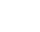
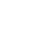
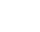
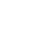
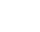
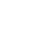
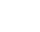
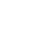
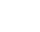
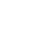
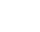
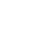
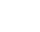
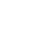
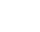
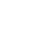
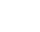
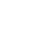
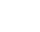
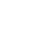

In [19]:
# Example usage
etfs = ["SPY", "IVV", "VOO", "VTI", "QQQ", "VEA", "VUG", "VTV", "IEFA", "AGG"]
for etf in etfs:
    news_headlines = fetch_news(etf)
    print(news_headlines)
    # for headline in news_headlines:
    #     embedding = get_word_embedding(headline)
    #     print(f"Embedding for '{etf}' in headline '{headline}': {embedding}")